# Credit Card Fraud Detection in Python using sklearn



Main challenges involved in credit card fraud detection are: Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time. Imbalanced Data i.e most of the transactions(99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones Data availability as the data is mostly private. Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported. And last but not the least, Adaptive techniques used against the model by the scammers.

Importing the Dependencies

In [94]:
import psutil ; print(list(psutil.virtual_memory())[0:2])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import importlib
import pickle
import gc
gc.collect()
print(list(psutil.virtual_memory())[0:2])

[8470646784, 1188696064]
[8470646784, 1177214976]


In [31]:
credit_card_data = pd.read_csv("creditcard_dataset.csv")
print(credit_card_data.shape)
print(credit_card_data.columns)
credit_card_data.head(3)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [95]:
# Put columns in order of importance for fraud detection 

sorted_cols = ['V14', 'V4', 'V10', 'V17', 'Time', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23', 'Class']

credit_card_data = credit_card_data[ sorted_cols ].copy()

# Exploratory Data Analysis (EDA)

In [122]:
import seaborn as sns

In [113]:
credit_card_data = pd.read_csv('creditcard_dataset.csv')
print(credit_card_data.shape)
print(credit_card_data.columns)
credit_card_data.head(3)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [114]:
# data columns will be all other columns except class

label_cols = ['Class']
credit_card_data_cols = list(credit_card_data.columns[ credit_card_data.columns != 'Class' ])

print(credit_card_data_cols)
print('# of data columns: ',len(credit_card_data_cols))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# of data columns:  30


Class : 1 for fraudulent transactions, 0 otherwise

In [115]:
# 284315 normal transactions (class 0)
# 492 fraud transactions (class 1)

credit_card_data.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

As we can see, the dataset is unbalance, because 1 of the variables, holds more than 99 per cent of the data. If we would train the this dataset into a machine learning model. it woldnt recognize the fraudulent transaction. In order to fix it, we would have to proceecer and handle this unbalance dataset
#0 for normal transaction. #1 for fraudulent

In [117]:
normal_duplicates = sum( credit_card_data.loc[ credit_card_data.Class==0 ].duplicated() )
fraud_duplicates = sum( credit_card_data.loc[ credit_card_data.Class==1 ].duplicated() )
total_duplicates = normal_duplicates + fraud_duplicates

print( 'Normal duplicates', normal_duplicates )
print( 'Fraud duplicates', fraud_duplicates )
print( 'Total duplicates', total_duplicates )
print( 'Fraction duplicated', total_duplicates / len(credit_card_data) )

Normal duplicates 1062
Fraud duplicates 19
Total duplicates 1081
Fraction duplicated 0.00379555277784605


Last time value: 48.00


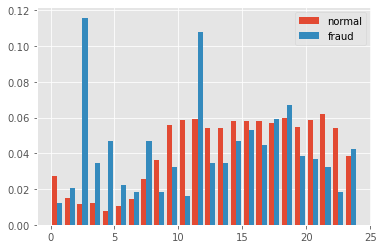

In [118]:
print( 'Last time value: {:.2f}'.format( credit_card_data['Time'].max() / 3600 ) )

credit_card_data['Time'] = ( credit_card_data['Time'].values / 3600 ) % 24

plt.hist( [ credit_card_data.loc[ credit_card_data['Class']==0, 'Time'], credit_card_data.loc[ credit_card_data['Class']==1, 'Time'] ],
         density=True, label=['normal','fraud'], bins=np.linspace(0,24,25))
plt.legend()
plt.show()

In [112]:
credit_card_data.skew() #calculate the skewness of a dataset

Time       0.000000
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

visualizing all the features from the dataset on graphs.

In [119]:
# Minimum 'Amount' is 0
# 0's account for 0.6% of the data set

print( credit_card_data['Amount'].min() )
print( np.sum( credit_card_data['Amount']==0 ) )
# print( np.sum( data['Amount']<0.01 ) )
print( np.sum( credit_card_data['Amount']==0 ) / len(credit_card_data) )

0.0
1825
0.006407848121710491


C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

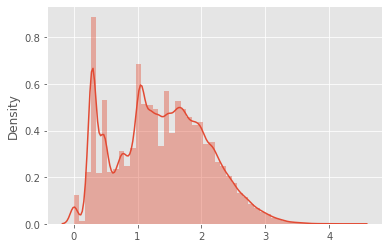

In [123]:
amount = [credit_card_data['Amount'].values]
sns.distplot(amount)

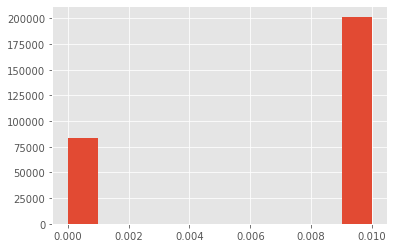

In [44]:
credit_card_data['Amount'].mod(0.01).hist() ;

In [45]:
print( credit_card_data.Amount.value_counts().head(15) )

1.00     13688
1.98      6044
0.89      4872
9.99      4747
15.00     3280
0.76      2998
10.00     2950
1.29      2892
1.79      2623
0.99      2304
20.00     2002
0.00      1825
8.99      1811
11.50     1741
4.49      1579
Name: Amount, dtype: int64


In [ ]:
# Log transform amount values to give more normal distribution; data preprocessing technique commonly used in statistics and data analysis to address issues of skewed or highly variable data distributions. The log transformation involves taking the natural logarithm (base e) of each data point in a dataset, resulting in a new set of transformed values.

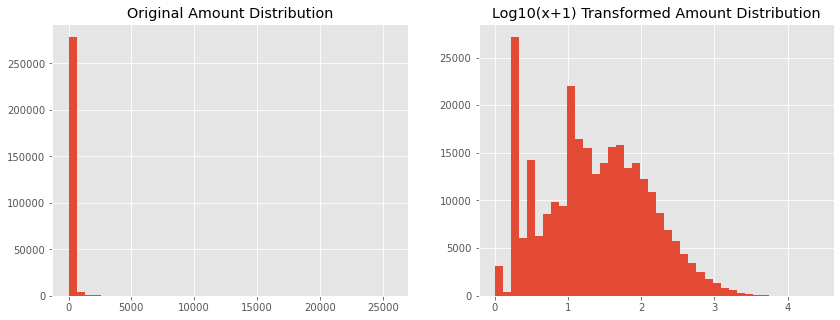

In [46]:

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(credit_card_data['Amount'], bins=40)
plt.title('Original Amount Distribution')

plt.subplot(1,2,2)
d0 = np.log10( credit_card_data['Amount'].values + 1 )
# d0 = np.log1p( data['Amount'].values ) / np.log(10)
plt.hist( d0, bins=40 )
plt.title('Log10(x+1) Transformed Amount Distribution')
plt.show()

In [120]:
credit_card_data['Amount'] = d0

In [54]:
# Center and scale all data, only using the middle 99.8%, so outliers don't pull too much.
# First generate the percentile data for each feature

percentiles =  pd.DataFrame( np.array([ np.percentile( credit_card_data[i], [ 0.1, 99.9 ] ) for i in  credit_card_data_cols ]).T,
                            columns= credit_card_data_cols, index=['min','max'] )

percentile_means = \
    [ [ np.mean( credit_card_data.loc[ (credit_card_data[i]>percentiles[i]['min']) & (credit_card_data[i]<percentiles[i]['max']) , i ] ) ]
     for i in credit_card_data_cols ]

percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=credit_card_data_cols, index=['mean']) )

percentile_stds = \
    [ [ np.std( credit_card_data.loc[ (credit_card_data[i]>percentiles[i]['min']) & (credit_card_data[i]<percentiles[i]['max']) , i ] ) ]
     for i in  credit_card_data_cols ]

percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns= credit_card_data_cols, index=['stdev']) )

percentiles

C:\Users\stefa\AppData\Local\Temp\ipykernel_23140\2966274302.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=credit_card_data_cols, index=['mean']) )
C:\Users\stefa\AppData\Local\Temp\ipykernel_23140\2966274302.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns= credit_card_data_cols, index=['stdev']) )


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
min,204.000000,-16.044343,-15.126221,-9.870326,-4.163262,-9.408512,-5.290163,-9.365179,-13.102174,-3.305247,...,-6.621889,-5.490204,-3.119845,-5.452756,-2.001248,-2.403083,-1.276676,-3.823857,-2.629030,0.000000
max,172522.194000,2.344685,7.852129,3.387393,6.235906,8.074611,6.164944,7.972745,6.135087,5.960836,...,5.809376,7.879007,2.260348,4.759942,1.246819,1.873743,2.251097,2.607462,2.095818,3.477266
mean,94831.114043,0.020195,0.012756,0.011923,-0.003827,0.002532,-0.000677,0.001153,0.011022,-0.002363,...,0.002214,-0.002930,0.001083,0.002081,0.000089,0.000504,-0.001117,0.001314,-0.000914,1.375513
stdev,47376.608634,1.814661,1.429787,1.419404,1.383725,1.208541,1.263637,1.018486,0.956445,1.064801,...,0.595668,0.550113,0.704365,0.433626,0.596816,0.505554,0.474011,0.330955,0.223416,0.710045


C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

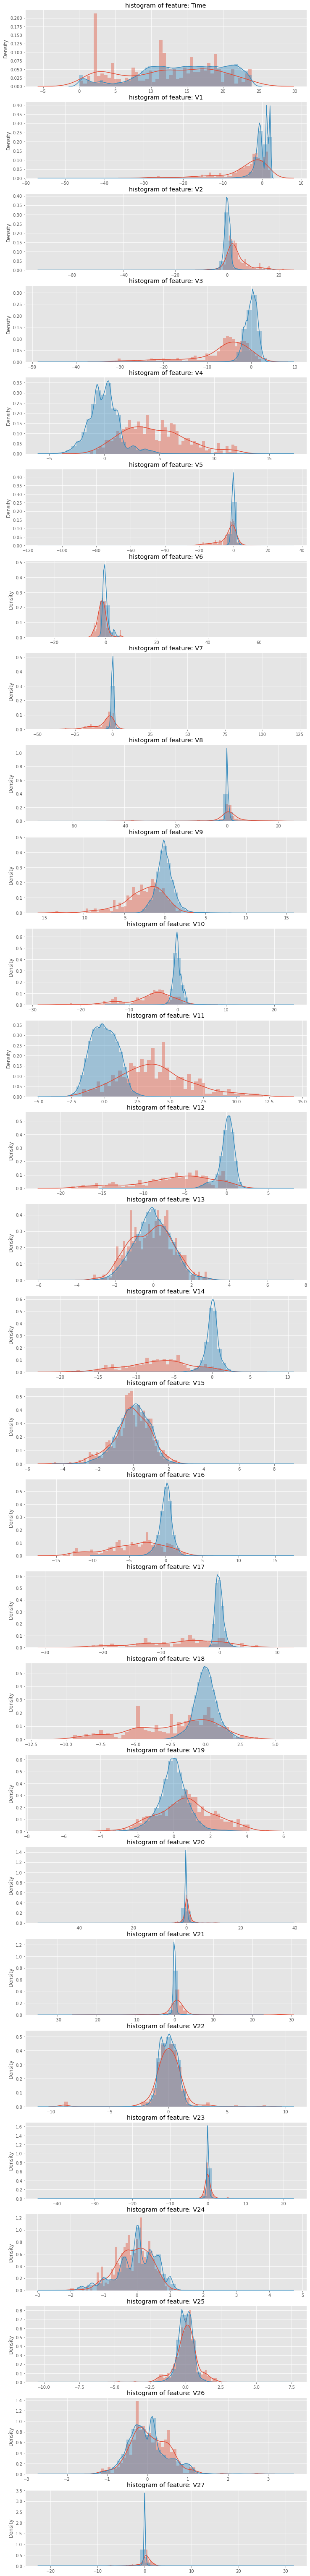

In [124]:
from matplotlib import gridspec
# distribution of anomalous features
features = credit_card_data.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(credit_card_data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit_card_data[c][credit_card_data.Class == 1], bins=50)
    sns.distplot(credit_card_data[c][credit_card_data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

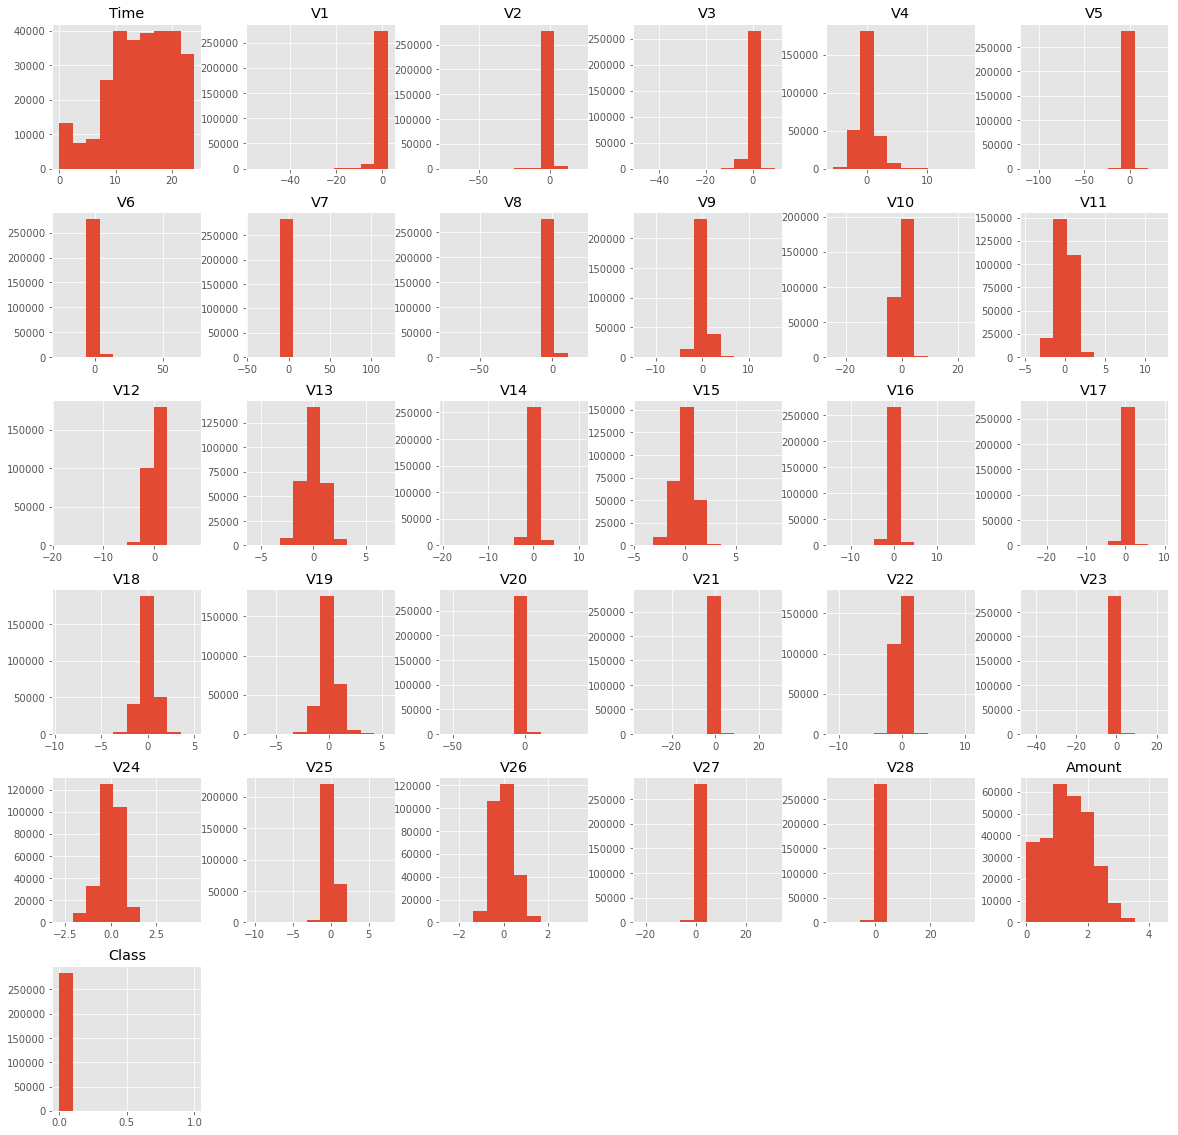

In [125]:
credit_card_data.hist(figsize = (20, 20))
plt.show()

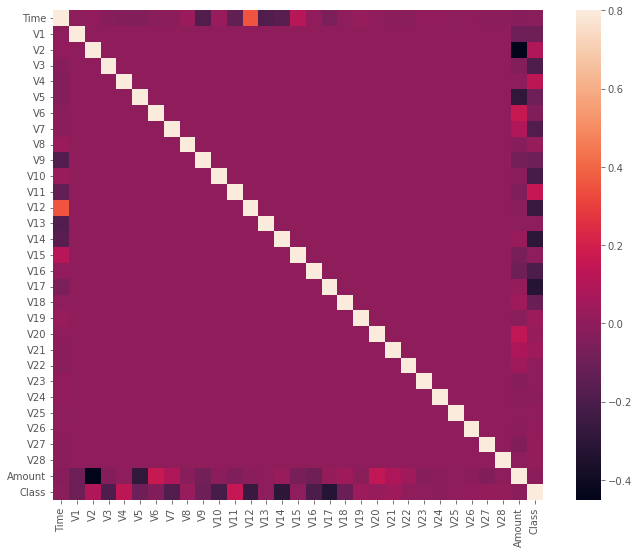

In [126]:
# Correlation matrix
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [127]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,14.542106,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,1.369227
1,12.136986,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.224969


As we can see, we got 2 classes, 0 for normal transaction, and 1 for fraudulent transaction. It gives the mean of every column. The V1 we can observer that the mean is 0.008258, while the varible 1 the Mean is -4.771948, we can see a wide difference between the two varible. When working with Machine Learning algorithm, it would helps us find the difference between legt and fraudulent transactions.

Dealing with Unbalance Data Building a sample dataset from the dataset, it will contain a similar distribution of normal and Fraudulent Transaction.

In [132]:
normal_duplicates = credit_card_data[credit_card_data.Class ==0]
fraud_duplicates = credit_card_data[credit_card_data.Class ==1]

In [135]:
outlier_fraction = len(fraud_duplicates)/float(len(normal_duplicates))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(credit_card_data[credit_card_data['Class'] == 1])))
print('legit Transactions: {}'.format(len(credit_card_data[credit_card_data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
legit Transactions: 284315


In [140]:
#statical measures of the data 
normal_duplicates.Amount.describe()

count    284315.000000
mean          1.369227
std           0.718961
min           0.000000
25%           0.822822
50%           1.361728
75%           1.892373
max           4.409801
Name: Amount, dtype: float64

In [137]:
credit_card_data.groupby("Class").mean() #Compare the values for both transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,14.542106,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,1.369227
1,12.136986,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.224969


Dealing with Unbalance Data Building a sample dataset from the dataset, it will contain a similar distribution of normal and Fraudulent Transaction

In [142]:
normal_duplicates_sample = normal_duplicates.sample(n=492) #taking the radom saple of the dataset #taking the radom saple of the dataset

Concatenating Dataframes

In [143]:
new_data = pd.concat([normal_duplicates_sample,fraud_duplicates], axis=0)

In [144]:
new_data.head() #showing the new dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
266085,21.050833,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,0.634425,...,0.197782,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,0.600973,0
172120,9.601944,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,0.477999,...,-0.336497,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,0.474216,0
15136,7.356667,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,1.750710,...,1.371671,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,3.287502,0
96393,18.264167,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,-1.910354,...,-0.065082,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,2.506573,0
208225,14.062500,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,0.492435,...,0.008303,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,1.096910,0


In [145]:
new_data.tail() #showing the new dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,22.983889,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,2.592177,1
280143,23.040833,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.245513,1
280149,23.041944,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1.897022,1
281144,23.212778,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,2.390935,1
281674,23.318889,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1.638789,1


In [146]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now we have a normal distributuon dataset

Spliting the dataset into features and targets

In [147]:
X= new_data.drop(columns='Class', axis=1)
Y= new_data['Class']

In [176]:
print(X.shape)
print(Y.shape)

(984, 30)
(984,)


In [177]:
X_credit_card_data=X.values
Y_credit_card_data=Y.values ##getting just the values for the sake of processing (its a numpy array with no columns)


In [178]:
print(Y)

266085    0
172120    0
15136     0
96393     0
208225    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [179]:
#Using Scikit-learn to split data into training and testing sets

In [180]:
import sklearn
import numpy as np # used to make arrays
import pandas as pd #using for reading 
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # allow us to split data into train and testing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [184]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [185]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [186]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)


# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y_test).sum()

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


the Model used is Isolation Forest
The accuracy is  0.5076142131979695
The precision is 1.0
The recall is 0.01020408163265306
The F1-Score is 0.020202020202020204
The Matthews correlation coefficient is0.07179207795648106


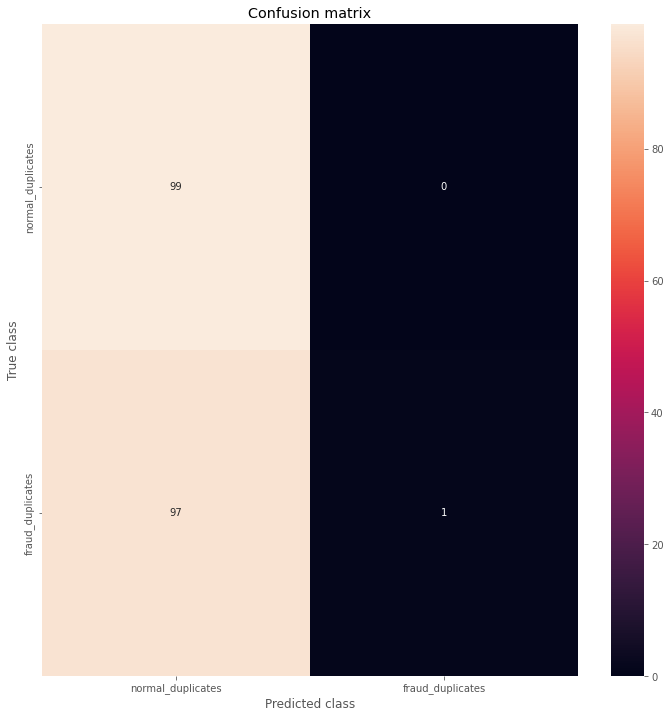

Isolation Forest: 97
0.5076142131979695
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        99
           1       1.00      0.01      0.02        98

    accuracy                           0.51       197
   macro avg       0.75      0.51      0.35       197
weighted avg       0.75      0.51      0.35       197



<Figure size 648x504 with 0 Axes>

In [189]:
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud_duplicates)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

#printing the confusion matrix
LABELS = ['normal_duplicates', 'fraud_duplicates']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

In [ ]:
#GridSearchCV - Parameter optimization

In [199]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
import os
import pickle
import graphviz

In [200]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

NameError: name 'rfc' is not defined

In [55]:
credit_card_data[credit_card_data_cols] = ( credit_card_data[credit_card_data_cols] - percentiles.loc[ 'mean', credit_card_data_cols ] ) / percentiles.loc[ 'stdev', credit_card_data_cols ]

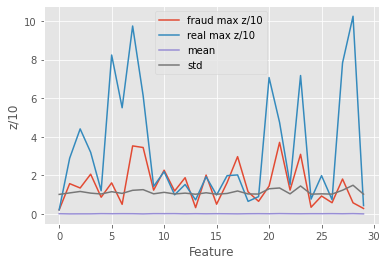

In [56]:
plot_cols = credit_card_data_cols
# plt.plot( np.log10( data[ plot_cols ].abs().max().values ) )
# plt.plot( data[ plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='max z/10' )
plt.plot( credit_card_data.loc[ credit_card_data.Class==1, plot_cols ].abs().max().values / credit_card_data[ plot_cols ].std().values / 10, label='fraud max z/10' )
plt.plot( credit_card_data.loc[ credit_card_data.Class==0, plot_cols ].abs().max().values / credit_card_data[ plot_cols ].std().values / 10, label='real max z/10' )
plt.plot( credit_card_data[ plot_cols ].mean().values, label='mean' )
# plt.plot( data[ plot_cols ].abs().mean().values, label='abs mean' )
plt.plot( credit_card_data[ plot_cols ].std().values, label='std' )
plt.xlabel('Feature')
plt.ylabel('z/10')
plt.legend() ; 

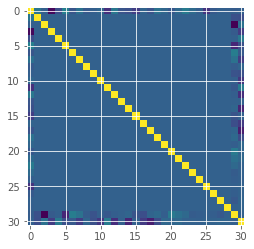

In [57]:
# Check Correlations
# Note no correlations among PCA transformed columns, as expected
corr0 = credit_card_data.corr()
plt.imshow(corr0) ;

# Data Distributions by Feature and Class

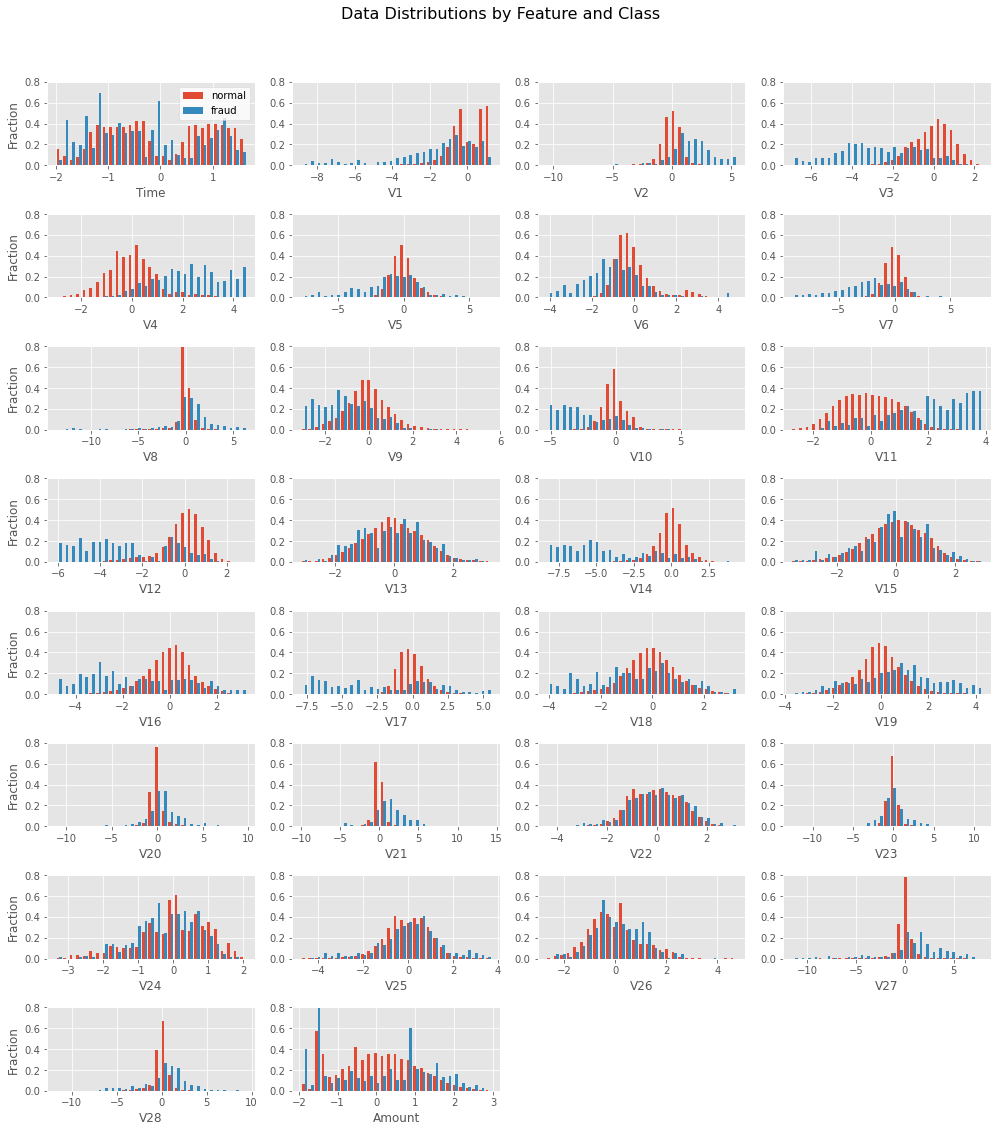

In [65]:
# Plot the data by each feature

axarr = [[]]*len(credit_card_data_cols)
columns = 4
rows = int( np.ceil( len(credit_card_data_cols) / columns ) )
f, fig = plt.subplots( figsize=(columns*3.5, rows*2) )

f.suptitle('Data Distributions by Feature and Class', size=16)

for i, col in enumerate(credit_card_data_cols[:]):
    axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )
    axarr[i].hist( [ credit_card_data.loc[ credit_card_data.Class == 0, col ], credit_card_data.loc[ credit_card_data.Class == 1, col ] ], label=['normal','fraud'], 
                          bins=np.linspace( np.percentile(credit_card_data[col],0.1), np.percentile(credit_card_data[col],99.9), 30 ),
                          density=True )
    axarr[i].set_xlabel(col, size=12)
    axarr[i].set_ylim([0,0.8])
    axarr[i].tick_params(axis='both', labelsize=10)
    if i == 0: 
        legend = axarr[i].legend()
        legend.get_frame().set_facecolor('white')
    if i%4 != 0 : 
        axarr[i].tick_params(axis='y', left='off', labelleft='off')
    else:
        axarr[i].set_ylabel('Fraction',size=12)

plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
# plt.savefig('plots/Engineered_Data_Distributions.png')
plt.show()

In [70]:
pickle.dump(credit_card_data, open('creditcard.csv','wb'))

#credit_card_data = pd.read_csv('creditcard.csv')

Classification